## ICE 4

**Author**: Nicolas Dussaillant

**Instructor**: Dr. Lukas Liu

**Course**: HUDK4051 - Learning Analytics - Teachers College, Columbia University

## Work: Recommender System

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
interest = pd.read_csv("interest.csv")
difficulty = pd.read_csv("difficulty.csv")

In [3]:
interest.head()

,id,prediction.interest,nlp.interest,sna.interest,neural.interest,viz.interest,loop.interest,sql.interest
0,s1,5,5.0,4,5.0,2,4.0,5.0
1,s2,5,5.0,5,5.0,5,5.0,5.0
2,s3,5,5.0,5,5.0,5,4.0,4.0
3,s4,4,5.0,5,5.0,5,5.0,5.0
4,s5,4,4.0,4,5.0,4,4.0,5.0


In [4]:
difficulty.head()

,id,prediction.difficulty,nlp.difficulty,sna.difficulty,neural.difficulty,viz.difficulty,loop.difficulty,sql.difficulty
0,s1,4,5.0,3,5.0,3.0,3.0,5.0
1,s2,5,5.0,5,5.0,5.0,5.0,5.0
2,s3,3,3.0,3,3.0,3.0,3.0,2.0
3,s4,3,4.0,4,4.0,4.0,5.0,3.0
4,s5,4,4.0,4,5.0,4.0,4.0,4.0


In [9]:
di = {
    "type" : ["prediction", "nlp", "sna", "neural", "viz", "loop", "sql"],
    "difficulty" : [difficulty["prediction.difficulty"].mean(),
                   difficulty["nlp.difficulty"].mean(),
                   difficulty["sna.difficulty"].mean(),
                   difficulty["neural.difficulty"].mean(),
                   difficulty["viz.difficulty"].mean(),
                   difficulty["loop.difficulty"].mean(),
                   difficulty["sql.difficulty"].mean()],
    "interest" : [interest["prediction.interest"].mean(),
                   interest["nlp.interest"].mean(),
                   interest["sna.interest"].mean(),
                   interest["neural.interest"].mean(),
                   interest["viz.interest"].mean(),
                   interest["loop.interest"].mean(),
                   interest["sql.interest"].mean()],
}
difficulty_interest = pd.DataFrame(di)
difficulty_interest

,type,difficulty,interest
0,prediction,3.807692,4.326923
1,nlp,4.220000,4.431373
2,sna,3.769231,4.134615
3,neural,4.400000,4.490196
4,viz,4.060000,4.596154
5,loop,4.080000,4.431373
6,sql,3.693878,4.431373


### Content-Based Recommender

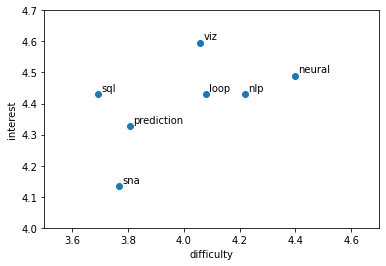

In [12]:
# Plot the basic scatter plot
plt.scatter(difficulty_interest.difficulty, difficulty_interest.interest)

for i, index in enumerate (difficulty_interest.type):
    plt.text(difficulty_interest.difficulty[i]+0.01, difficulty_interest.interest[i]+0.01, index)

plt.xlim (3.5, 4.7)
plt.ylim (4.0, 4.7)
plt.xlabel("difficulty")
plt.ylabel("interest");

In [17]:
import math

# New column called distance. 0 to all rows.
difficulty_interest_distance = difficulty_interest.copy()
difficulty_interest_distance['distance'] = 0

# Pick any row to start
item = difficulty_interest_distance[["difficulty", "interest"]].iloc[1,]

# Loop around the data frame index; Obtain the target row; Calculate the distance
# Assign to d; And assign to the corresponding cell.
for i in difficulty_interest_distance.index:
    target = difficulty_interest_distance[["difficulty", "interest"]].loc[i,]
    d = math.dist(item, target)
    difficulty_interest_distance.loc[i, 'distance'] = d

# Sort the result by distance
difficulty_interest_distance.sort_values('distance', ascending=True)

,type,difficulty,interest,distance
1,nlp,4.220000,4.431373,0.000000
5,loop,4.080000,4.431373,0.140000
3,neural,4.400000,4.490196,0.189368
4,viz,4.060000,4.596154,0.229680
0,prediction,3.807692,4.326923,0.425332
6,sql,3.693878,4.431373,0.526122
2,sna,3.769231,4.134615,0.539683


Using Cosine

In [19]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(difficulty_interest[["difficulty", "interest"]])
cosine_sim

array([[1.        , 0.99922723, 0.99984605, 0.99856397, 0.99999823,
        0.99974724, 0.99964159],
       [0.99922723, 1.        , 0.99976308, 0.99989801, 0.99929948,
        0.99985835, 0.99781682],
       [0.99984605, 0.99976308, 1.        , 0.99935025, 0.99987732,
        0.99998782, 0.99901794],
       [0.99856397, 0.99989801, 0.99935025, 1.        , 0.99866309,
        0.999516  , 0.99677186],
       [0.99999823, 0.99929948, 0.99987732, 0.99866309, 1.        ,
        0.99978781, 0.99958939],
       [0.99974724, 0.99985835, 0.99998782, 0.999516  , 0.99978781,
        1.        , 0.99878705],
       [0.99964159, 0.99781682, 0.99901794, 0.99677186, 0.99958939,
        0.99878705, 1.        ]])

In [20]:
module_indices = pd.Series(range(len(difficulty_interest.index)), index = difficulty_interest.type)

module_indices

type
prediction    0
nlp           1
sna           2
neural        3
viz           4
loop          5
sql           6
dtype: int64

In [21]:
def get_recommendations(name, cosine_sim, matrix_indices):
    # Get the index of the movie that matches the title
    idx = matrix_indices[name]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:6]

    # Get the movie indices
    rank_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return matrix_indices.iloc[rank_indices]

In [22]:
get_recommendations("prediction", cosine_sim, module_indices)

type
viz     4
sna     2
loop    5
sql     6
nlp     1
dtype: int64

### Collaborative filter

In [23]:
interest_na = interest.dropna()
interest_na.index = interest_na.id
interest_clean = interest_na.drop('id', axis=1)

In [24]:
# Obtain the cosine similarity matrix
cosine_sim_interest = cosine_similarity(interest_clean, interest_clean)
# Create an index for the student list
id_indices = pd.Series(range(len(interest_clean.index)), index = interest_clean.index)

In [25]:
# Recycle the get_recommendations() that we have created
get_recommendations("s5", cosine_sim_interest, id_indices)

id
s2      1
s6      5
s12    11
s13    12
s16    15
dtype: int64